In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
df = pd.read_csv('/Users/uchino/Desktop/IoD/AmazonBooksBestsellers.csv')
df.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [27]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [28]:
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [29]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


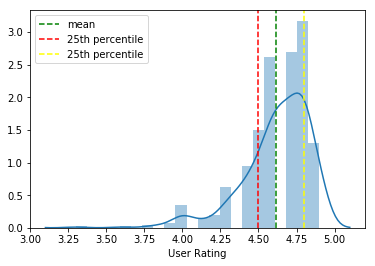

In [45]:
# distribution of customer rating & mean (Univariate analysis)
sns.distplot(df['User Rating'])
plt.axvline(x=np.mean(df['User Rating']), c = 'green', ls='--', label='mean')
plt.axvline(x=np.percentile(df['User Rating'],25), c = 'red', ls='--', label='25th percentile')
plt.axvline(x=np.percentile(df['User Rating'],75), c = 'yellow', ls='--', label='25th percentile')
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1adc4d68>,
      dtype=object)

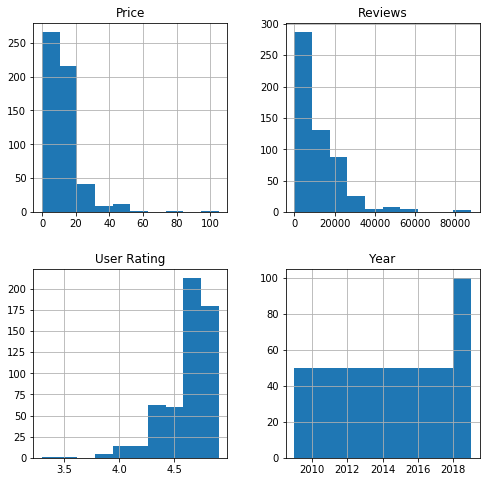

In [46]:
df.hist(figsize=(8,8))

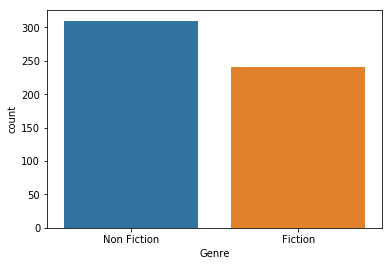

In [49]:
#aggregate price difference by Genre
sns.countplot(df['Genre'])

In [52]:
df['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

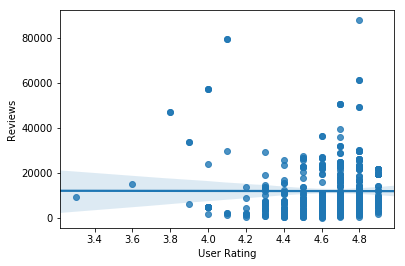

In [58]:
# Relationship between customer rating & reviews(Bivariate Analysis)
sns.regplot(df['User Rating'], df['Reviews'])

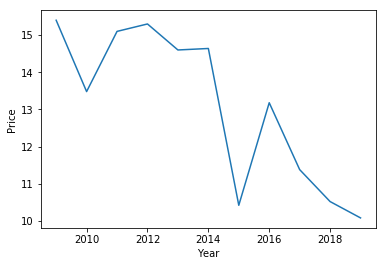

In [64]:
# time trend in price
sns.lineplot(x = df.groupby(df.Year).mean().index,
             y = df.groupby(df.Year).mean()['Price'])

In [70]:
# correlation analysis
df.corr()


,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


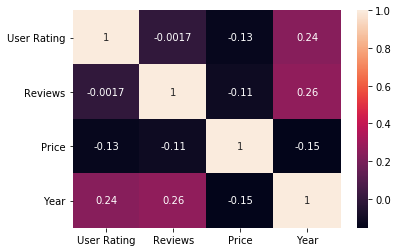

In [72]:
sns.heatmap(df.corr(), annot = True)